Справжні параметри:
  Перетин (b₀): 0
  Нахил  (b₁): 9


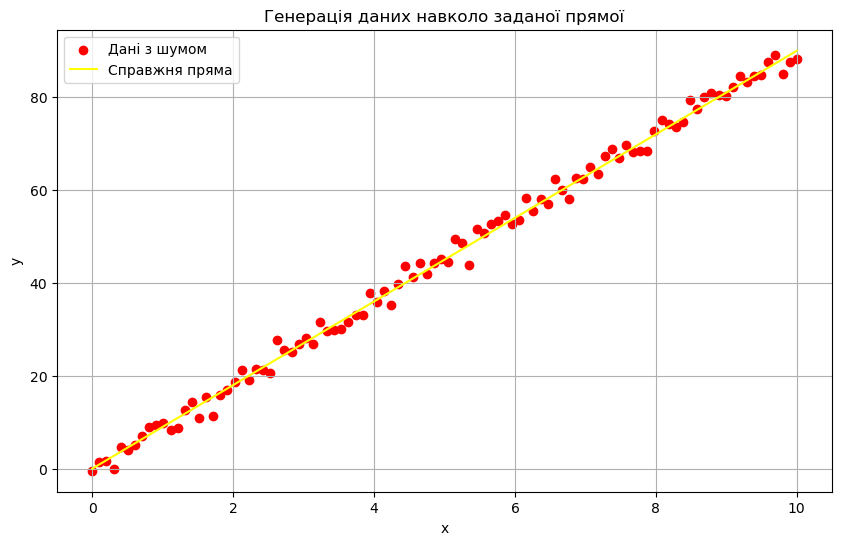

In [22]:
#1.1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_dataset(n_points=100):
    b00 = np.random.randint(0, 10)
    b11 = np.random.randint(1, 10)
    xs = np.linspace(0, 10, n_points)
    eps = np.random.normal(0, 1.5, n_points)

    ys_obs = b00 + b11 * xs + eps
    ys_exact = b00 + b11 * xs
    return xs, ys_obs, ys_exact, b00, b11, eps
x_data, y_noisy, y_true, b0, b1, noise_vector = create_dataset(100)

print("Справжні параметри:")
print("  Перетин (b₀):", b0)
print("  Нахил  (b₁):", b1)
plt.figure(figsize=(10,6))
plt.scatter(x_data, y_noisy, color='red', label='Дані з шумом')
plt.plot(x_data, y_true, color='yellow', label='Справжня пряма')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Генерація даних навколо заданої прямої")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#1.2
def lsq_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b1_o = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b0_o = y_mean - b1_o * x_mean
    return b0_o, b1_o

b0_o, b1_o = lsq_regression(x_data, y_noisy)
print("\nОцінки методом найменших квадратів:")
print("Коефіцієнт зсуву (b₀)", b0)
print("Кутовий коефіцієнт (b₁) ", b1)
print("Оптимальне значення зсуву (b₀):", b0_o)
print("Оптимальне значення коеф. кута нахил (b₁):", b1_o)



Оцінки методом найменших квадратів:
Коефіцієнт зсуву (b₀) 0
Кутовий коефіцієнт (b₁)  9
Оптимальне значення зсуву (b₀): -0.03540028267926232
Оптимальне значення коеф. кута нахил (b₁): 9.040342212824754


In [24]:
#1.3
poly_coefs = np.polyfit(x_data, y_noisy, 1)
est_b1_poly = poly_coefs[0]
est_b0_poly = poly_coefs[1]

print("\nПорівняння методів:")
print("  Справжні параметри:         b₀ =", b0, ", b₁ =", b1)
print("  МНК:                       b₀ =", b0_o, ", b₁ =", b1_o)
print("  np.polyfit:                b₀ =", est_b0_poly, ", b₁ =", est_b1_poly)


Порівняння методів:
  Справжні параметри:         b₀ = 0 , b₁ = 9
  МНК:                       b₀ = -0.03540028267926232 , b₁ = 9.040342212824754
  np.polyfit:                b₀ = -0.03540028267927369 , b₁ = 9.04034221282476


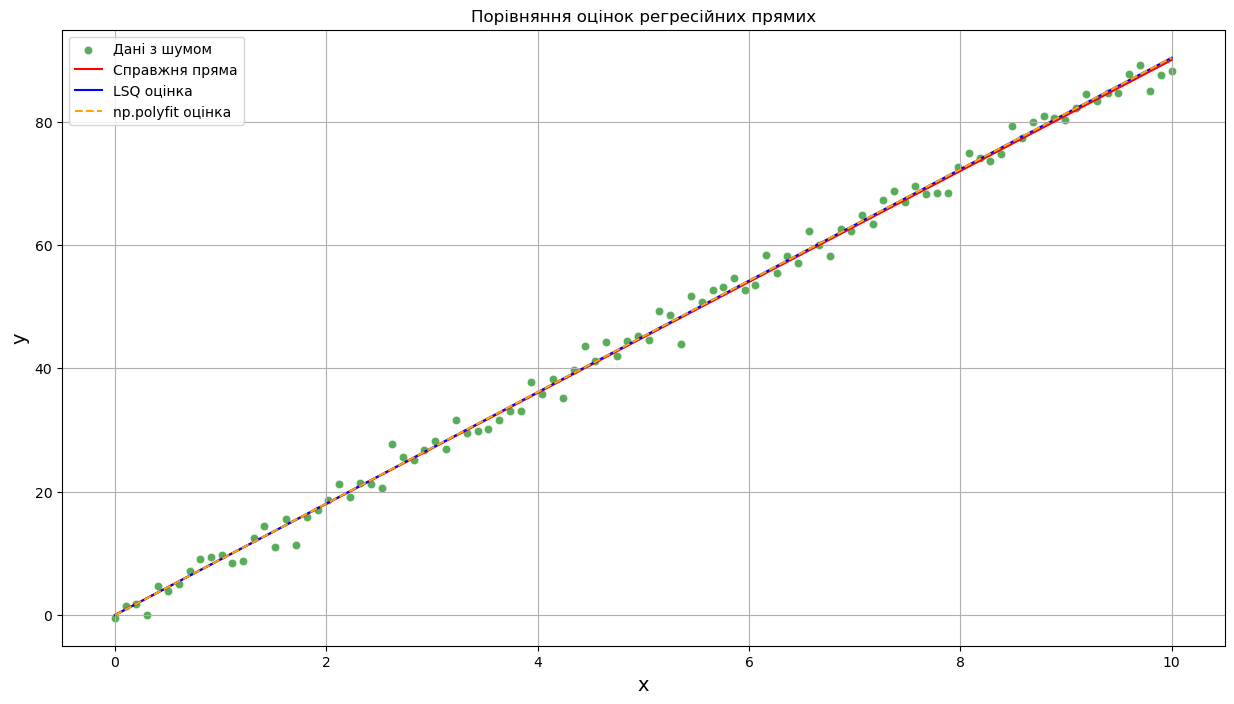

In [25]:
#1.4
def plot_regression_models(x, eps, b0, b1, lsq_params, poly_params):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x=x, y=b0 + b1 * x + eps, color='green', label='Дані з шумом', alpha=0.65)
    sns.lineplot(x=x, y=b0 + b1 * x, color='red', label='Справжня пряма')
    sns.lineplot(x=x, y=lsq_params[0] + lsq_params[1] * x, color='blue', label='LSQ оцінка')
    sns.lineplot(x=x, y=poly_params[0] + poly_params[1] * x, color='orange', linestyle='--', label='np.polyfit оцінка')
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.title("Порівняння оцінок регресійних прямих")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_regression_models(x_data, noise_vector, b0, b1, (b0_o, b1_o), (est_b0_poly, est_b1_poly))

In [26]:
#2.1
def gradient_descent(x, y, lr=0.001, num_iter=100000):
    n = len(y)
    cur_b0 = 0.0
    cur_b1 = 0.0
    for i in range(num_iter):
        preds = cur_b0 + cur_b1 * x
        error = y - preds
        grad_int = (-2/n) * np.sum(error)
        grad_slp = (-2/n) * np.sum(x * error)
        cur_b0 -= lr * grad_int
        cur_b1 -= lr * grad_slp
    return cur_b0, cur_b1

b0_gd, b1_gd = gradient_descent(x_data, y_noisy, lr=0.001, num_iter=100000)
print("\nГрадієнтний спуск:")
print(" Оптимальне значення Перетин (b₀):", b0_gd)
print(" Оптимальне значення Нахил  (b₁):", b1_gd)


Градієнтний спуск:
 Оптимальне значення Перетин (b₀): -0.03540028267901363
 Оптимальне значення Нахил  (b₁): 9.040342212824704


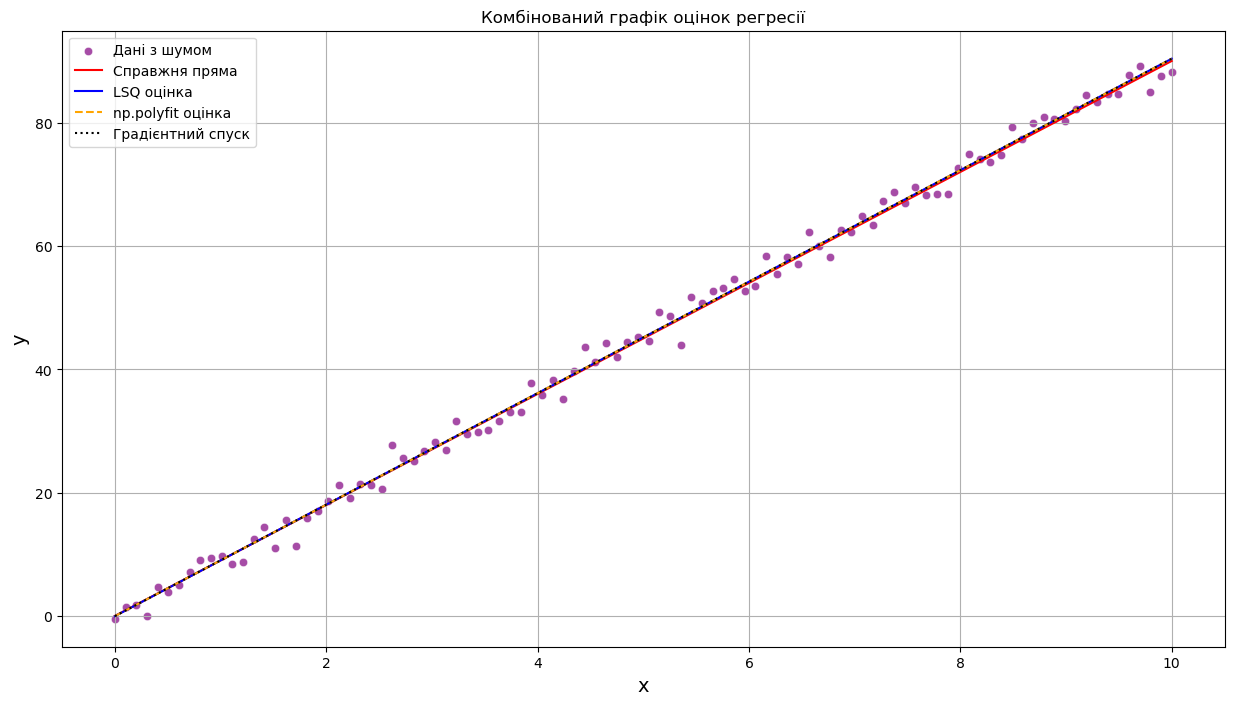

In [27]:
#2.2
def plot_all_estimations(x, eps, b0, b1, lsq_params, poly_params, gd_params):
    plt.figure(figsize=(15,8))
    
    sns.scatterplot(x=x, y=b0 + b1 * x + eps, color='purple', label='Дані з шумом', alpha=0.7)
    sns.lineplot(x=x, y=b0 + b1 * x, color='red', label='Справжня пряма')
    sns.lineplot(x=x, y=lsq_params[0] + lsq_params[1] * x, color='blue', label='LSQ оцінка')
    sns.lineplot(x=x, y=poly_params[0] + poly_params[1] * x, color='orange', linestyle='--', label='np.polyfit оцінка')
    sns.lineplot(x=x, y=gd_params[0] + gd_params[1] * x, color='black', linestyle=':', label='Градієнтний спуск')   
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.title("Комбінований графік оцінок регресії")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_all_estimations(x_data, noise_vector, b0, b1,
                     (b0_o, b1_o),
                     (est_b0_poly, est_b1_poly),
                     (b0_gd, b1_gd))

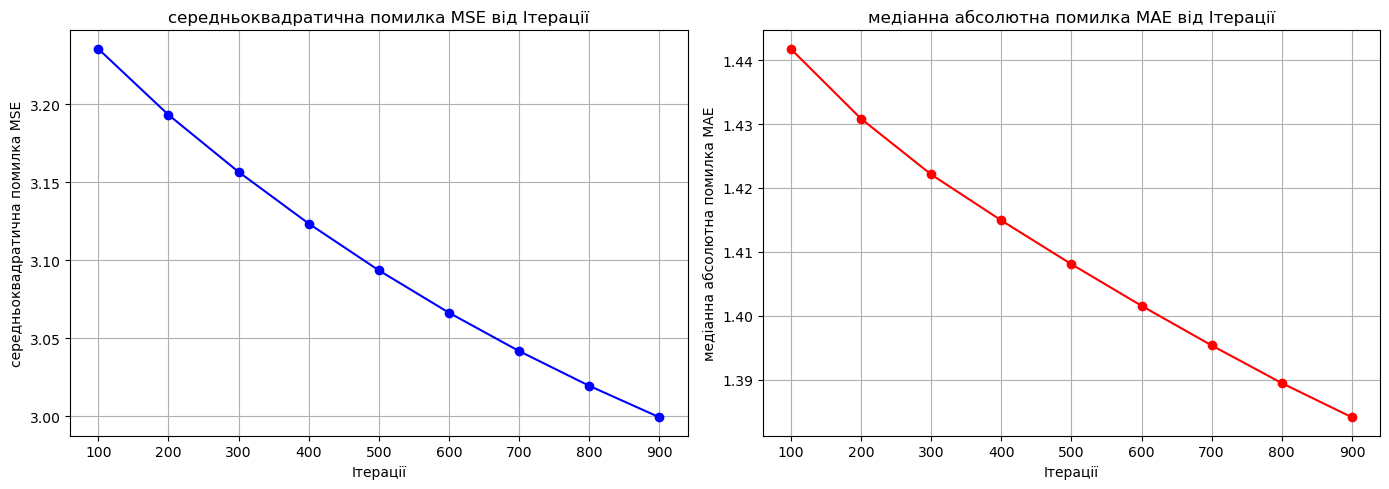

In [28]:
#2.3
def plot_error_vs_iters(x, y, lr=0.001):
    iter_range = range(100, 1000, 100)
    mse_list = []
    mae_list = []
    for num in iter_range:
        int_est, slp_est = gradient_descent(x, y, lr, num)
        pred_vals = int_est + slp_est * x
        mse_err = np.mean((y - pred_vals) ** 2)
        mae_err = np.mean(np.abs(y - pred_vals))
        mse_list.append(mse_err)
        mae_list.append(mae_err)   
    fig, ax = plt.subplots(1, 2, figsize=(14,5)) 
    ax[0].plot(list(iter_range), mse_list, 'o-', color='blue')
    ax[0].set_title("середньоквадратична помилка MSE від Ітерації")
    ax[0].set_xlabel("Ітерації")
    ax[0].set_ylabel("середньоквадратична помилка MSE")
    ax[0].grid(True) 
    ax[1].plot(list(iter_range), mae_list, 'o-', color='red')
    ax[1].set_title("медіанна абсолютна помилка MAE від Ітерації")
    ax[1].set_xlabel("Ітерації")
    ax[1].set_ylabel("медіанна абсолютна помилка MAE")
    ax[1].grid(True)
    plt.tight_layout()
    plt.show() 
    return mse_list, mae_list

mse_values, mae_values = plot_error_vs_iters(x_data, y_noisy, lr=0.001)

In [29]:
#2.4
print("\nПорівняльне резюме:")
print("  Справжні значення:             b₀ =", b0, " , b₁ =", b1)
print("  Метод найменших квадратів (LSQ): b₀ =", b0_o, " , b₁ =", b1_o)
print("  np.polyfit:                   b₀ =", est_b0_poly, " , b₁ =", est_b1_poly)
print("  Градієнтний спуск:             b₀ =", b0_gd, " , b₁ =", b1_gd)


Порівняльне резюме:
  Справжні значення:             b₀ = 0  , b₁ = 9
  Метод найменших квадратів (LSQ): b₀ = -0.03540028267926232  , b₁ = 9.040342212824754
  np.polyfit:                   b₀ = -0.03540028267927369  , b₁ = 9.04034221282476
  Градієнтний спуск:             b₀ = -0.03540028267901363  , b₁ = 9.040342212824704
